In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/Users/lucreziavaleriani/Desktop/claspy')

from claspy.segmentation import BinaryClaSPSegmentation

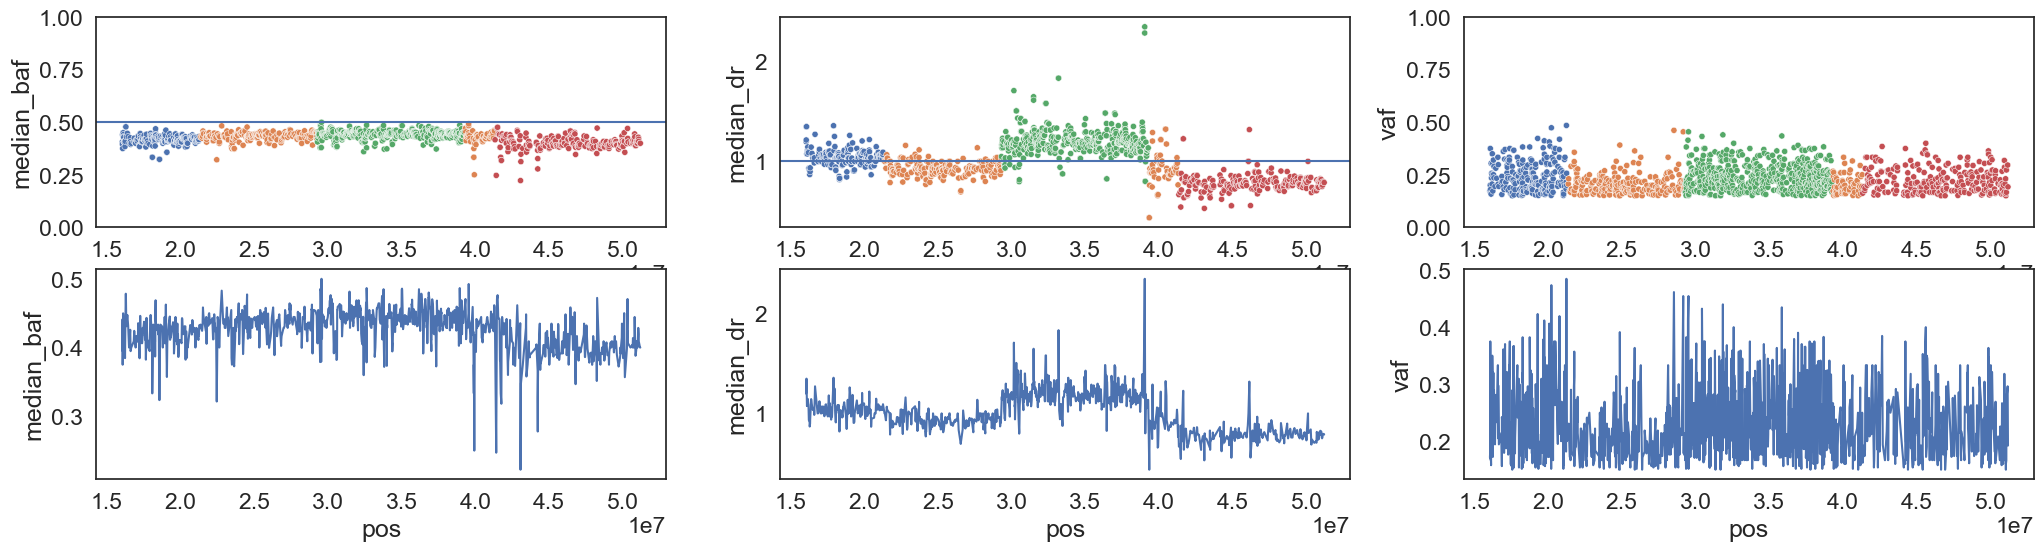

In [3]:
from plot import *
vaf, baf, dr, bps = get_original_data_plot('/Users/lucreziavaleriani/Desktop/seq_res_snv_smooth.csv', save = False)
bps = np.sort(bps)[1:-1]

In [4]:
n_segments = BinaryClaSPSegmentation(distance="euclidean_distance", window_size=10).n_segments
n_estimators = BinaryClaSPSegmentation(distance="euclidean_distance", window_size=10).n_estimators
window_size = 10 
k_neighbours = BinaryClaSPSegmentation(distance="euclidean_distance", window_size=10).k_neighbours
distance = "euclidean_distance" 
validation = BinaryClaSPSegmentation(distance="euclidean_distance", window_size=10).validation
threshold = BinaryClaSPSegmentation(distance="euclidean_distance", window_size=10).threshold
scored = BinaryClaSPSegmentation(distance="euclidean_distance", window_size=10).score
early_stopping = BinaryClaSPSegmentation(distance="euclidean_distance", window_size=10).early_stopping
excl_radius = BinaryClaSPSegmentation(distance="euclidean_distance", window_size=10).excl_radius
n_jobs = 1
random_state = BinaryClaSPSegmentation(distance="euclidean_distance", window_size=10).random_state


validation_test = map_validation_tests(validation)
mode = 'mult'

In [5]:
from functions import *

In [6]:
time_series = np.array([vaf, baf, dr])
n_timepoints = time_series.shape[1]

min_seg_size = window_size * excl_radius
n_segments = time_series.shape[1] // min_seg_size

In [7]:
dr_clasp, dr_profile, dr_cp, dr_range, dr_tree, dr_queue = get_first_cp(dr, n_estimators,
                 window_size, 
                 k_neighbours,
                 distance,
                 scored,
                 early_stopping,
                 excl_radius,
                 n_jobs, 
                 random_state, 
                 validation, 
                 threshold, 
                 n_segments)

baf_clasp, baf_profile, baf_cp, baf_range, baf_tree, baf_queue  = get_first_cp(baf, n_estimators,
                 window_size, 
                 k_neighbours,
                 distance,
                 scored,
                 early_stopping,
                 excl_radius,
                 n_jobs, 
                 random_state, 
                 validation, 
                 threshold, 
                 n_segments)

vaf_clasp, vaf_profile, vaf_cp, vaf_range, vaf_tree, vaf_queue = get_first_cp(vaf, n_estimators,
                 window_size, 
                 k_neighbours,
                 distance,
                 scored,
                 early_stopping,
                 excl_radius,
                 n_jobs, 
                 random_state, 
                 validation, 
                 threshold, 
                 n_segments)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/lucreziavaleriani/Desktop/claspy/claspy/nearest_neighbour.py:240: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  start, end = pranges[idx]


In [8]:
cp = take_first_cp(dr_profile, vaf_profile, baf_profile, mode)
dr_tree, dr_queue, baf_tree, baf_queue, vaf_tree, vaf_queue, cp = validate_first_cp(cp, 
                                                                                    threshold, validation_test,
                                                                                    dr_clasp, dr_tree, dr_queue, dr_range, dr_profile,
                                                                                    baf_clasp, baf_tree, baf_queue, baf_range, baf_profile,
                                                                                    vaf_clasp, vaf_tree, vaf_queue, vaf_range, vaf_profile)


CP is: 1109
CP passed: 1109


In [9]:
bps

array([ 229,  230,  464, 1034, 1101, 1102])

In [10]:
CP =  find_cp_iterative(dr_clasp, dr_tree, dr_queue, dr_profile,
                      baf_clasp, baf_tree, baf_queue, baf_profile,
                      vaf_clasp, vaf_tree, vaf_queue, vaf_profile,
                      n_segments, validation, threshold, window_size, min_seg_size,
                      n_estimators, k_neighbours, distance, scored, early_stopping, 
                      excl_radius, n_jobs, random_state, n_timepoints, 
                      dr, baf, vaf, 
                      mode)

selected cp: 1109
selected cp: 460
selected cp: 236
selected cp: 1027
Stop because queue is empty


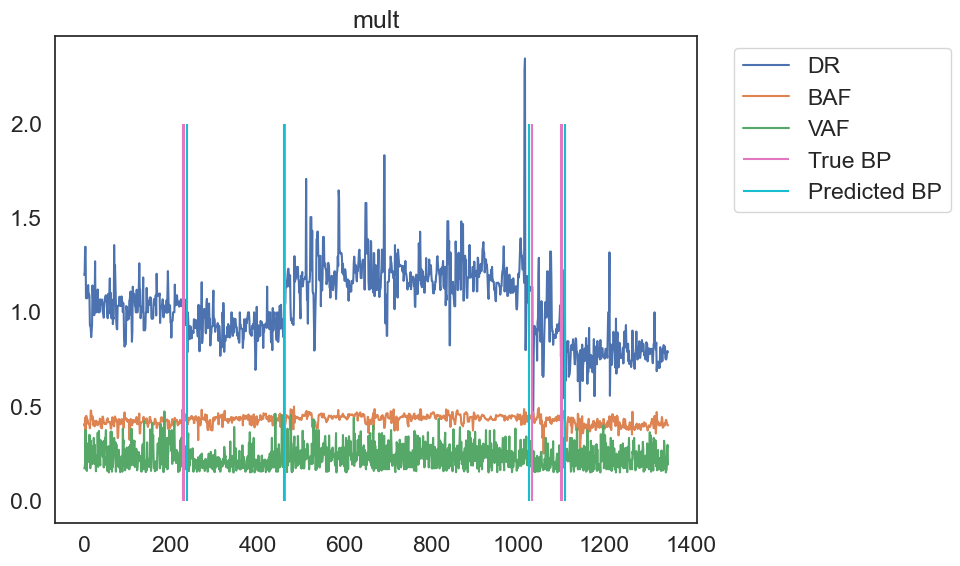

In [11]:
plot_profile(dr, baf, vaf, bps, CP, mode)